In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('dataset.csv')

In [80]:
df

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62
...,...,...,...,...,...,...,...,...,...,...,...
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,Rosemary,8261.63,1.00,754.98
247899,6.18,1.67,19.54,4.91,0.85,31.15,20.82,Acacia,6939.39,1.00,543.41
247900,7.78,1.49,15.78,5.69,0.73,44.60,44.07,Chestnut,4139.79,0.64,615.46
247901,5.78,1.74,14.96,6.81,0.83,47.19,37.79,Avocado,4417.74,0.97,949.32


In [81]:
df.isnull().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

In [82]:
df.duplicated().sum()

0

In [83]:
df.rename(columns= {'CS': "Color Score", 'WC': "Water Content",  'EC': "Electrical Conductivity", 'F':"Fructose Level", 
                    'G': "Glucose Level", "Pollen_analysis":'Pollen Analysis',},inplace=True)

In [84]:
df.describe()

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Viscosity,Purity,Price
count,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000
mean,5.500259,1.535523,18.502625,4.996047,0.799974,34.970573,32.501006,5752.893888,0.824471,594.807644
std,2.593947,0.187824,3.748635,1.444060,0.057911,8.655898,7.226290,2455.739903,0.139417,233.627972
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.000000,1500.050000,0.610000,128.720000
25%,3.260000,1.370000,15.260000,3.750000,0.750000,27.460000,26.230000,3627.880000,0.660000,433.000000
50%,5.500000,1.540000,18.510000,4.990000,0.800000,34.970000,32.490000,5753.770000,0.820000,612.960000
75%,7.740000,1.700000,21.750000,6.250000,0.850000,42.470000,38.760000,7886.650000,0.970000,770.220000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.970000,1.000000,976.690000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Color Score              247903 non-null  float64
 1   Density                  247903 non-null  float64
 2   Water Content            247903 non-null  float64
 3   pH                       247903 non-null  float64
 4   Electrical Conductivity  247903 non-null  float64
 5   Fructose Level           247903 non-null  float64
 6   Glucose Level            247903 non-null  float64
 7   Pollen Analysis          247903 non-null  object 
 8   Viscosity                247903 non-null  float64
 9   Purity                   247903 non-null  float64
 10  Price                    247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


In [86]:
numerical_variables = df.dtypes[df.dtypes == 'float64'].index
categorical_variables = df.dtypes[df.dtypes == 'object'].index

In [87]:
numerical_variables

Index(['Color Score', 'Density', 'Water Content', 'pH',
       'Electrical Conductivity', 'Fructose Level', 'Glucose Level',
       'Viscosity', 'Purity', 'Price'],
      dtype='object')

### EDA

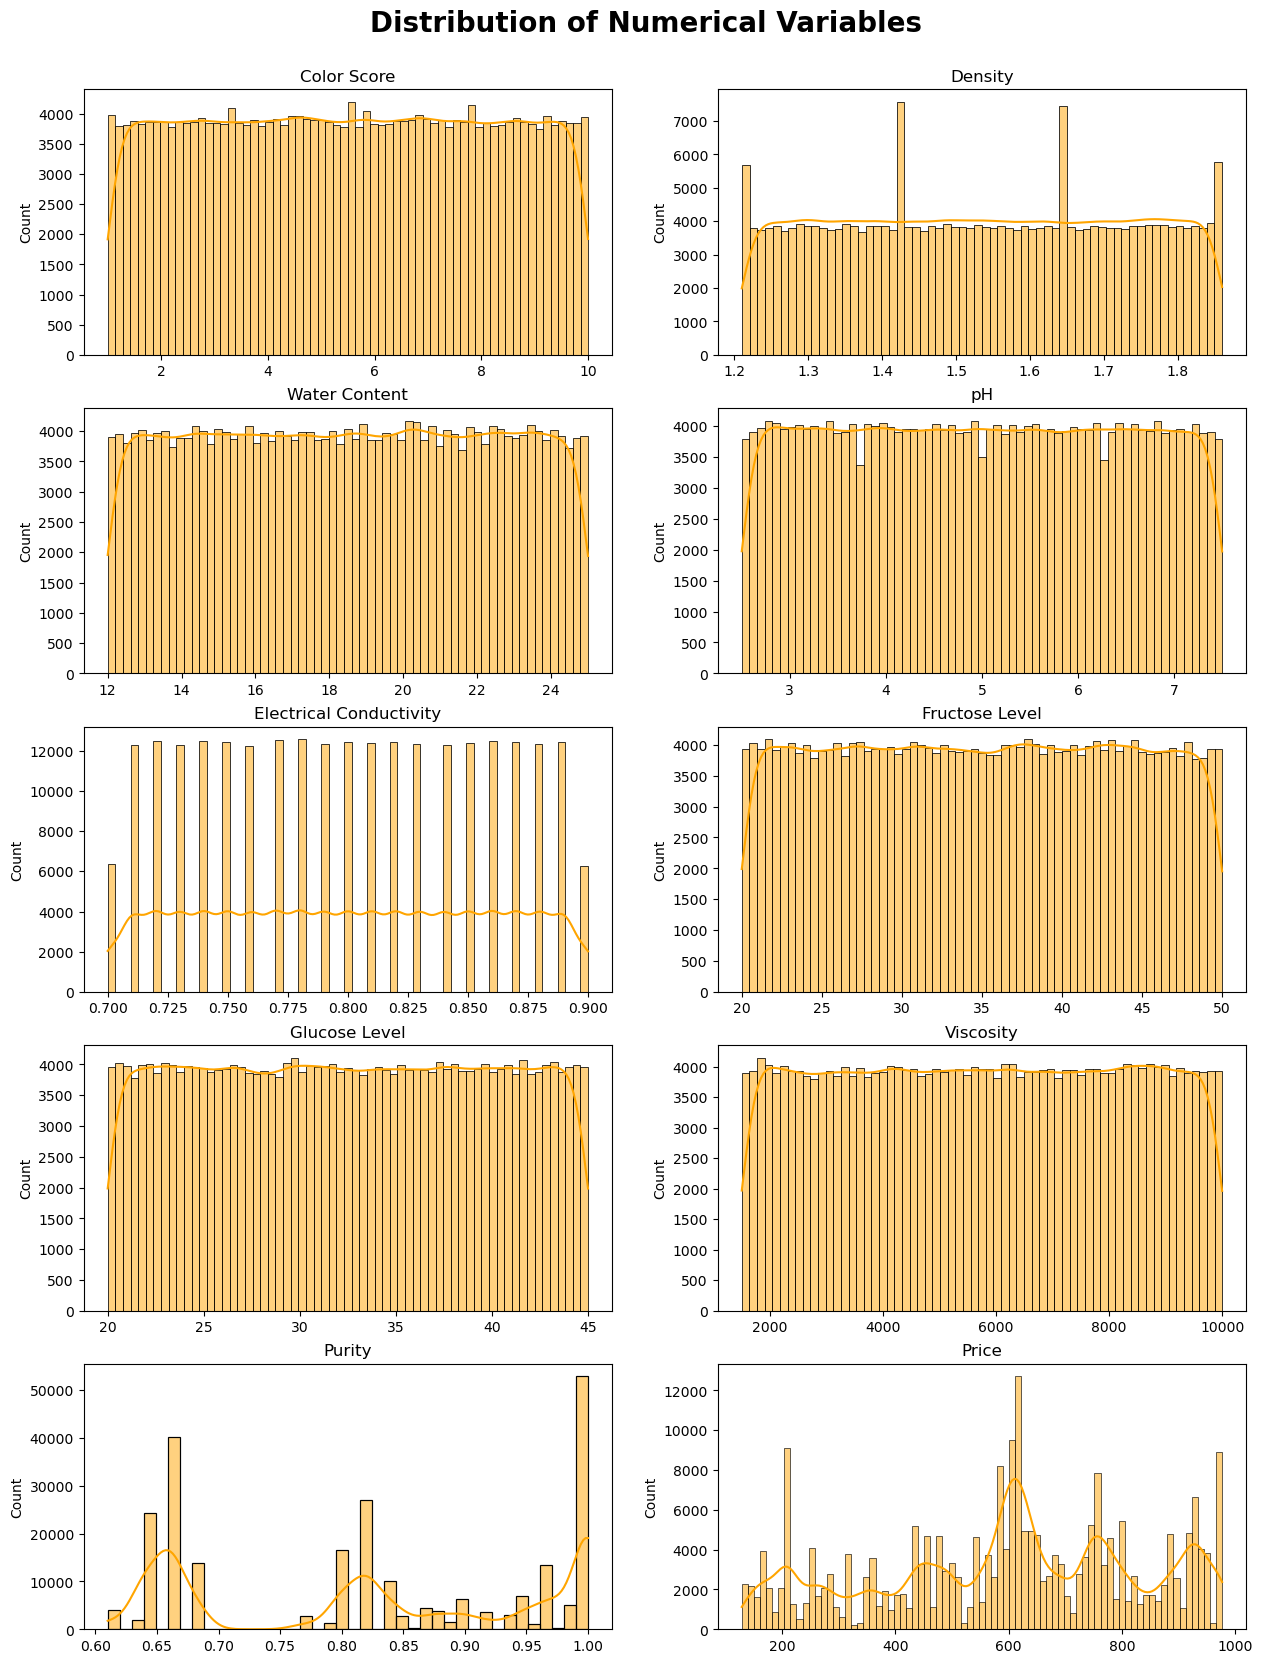

In [12]:
#Histogram

plt.figure(figsize = (15, 20))

index = 1
for variable in (numerical_variables):
    plt.subplot(5, 2, index)
    sns.histplot(x = df[variable], kde=True, color='Orange')
    plt.title(variable)
    index += 1
    plt.xlabel('')

plt.suptitle('Distribution of Numerical Variables', size=20, weight='bold', y=0.92)
plt.show()

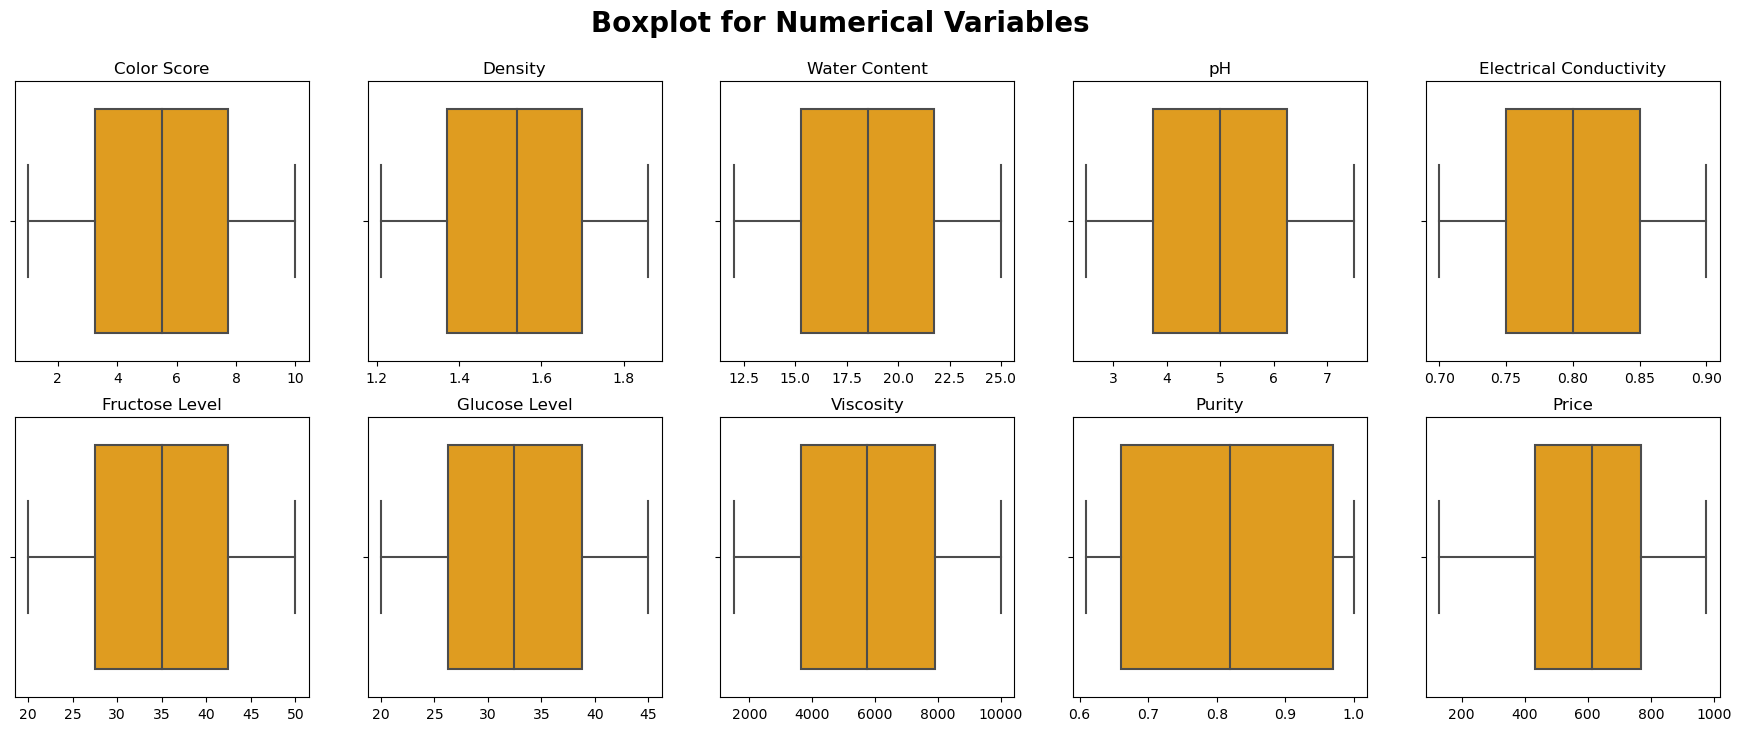

In [107]:
#Barplot

plt.figure(figsize = (22, 8))

index = 1
for  variable in (numerical_variables):
    plt.subplot(2, 5, index)
    sns.boxplot(x = df[variable], color='orange')
    plt.title(variable)
    index += 1
    plt.xlabel('')

plt.suptitle('Boxplot for Numerical Variables', size=20, weight='bold', y=0.97)
plt.show()

In [14]:
df['Pollen Analysis'].unique()

array(['Blueberry', 'Alfalfa', 'Chestnut', 'Borage', 'Sunflower',
       'Orange Blossom', 'Acacia', 'Tupelo', 'Clover', 'Wildflower',
       'Thyme', 'Sage', 'Avocado', 'Lavender', 'Eucalyptus', 'Buckwheat',
       'Rosemary', 'Heather', 'Manuka'], dtype=object)

In [15]:
for value in categorical_variables:
    print(df[value].value_counts())

Eucalyptus        13194
Avocado           13191
Heather           13187
Thyme             13156
Sunflower         13148
Sage              13117
Blueberry         13106
Lavender          13086
Alfalfa           13049
Buckwheat         13036
Chestnut          13020
Wildflower        13016
Manuka            13003
Borage            13000
Orange Blossom    12992
Acacia            12976
Rosemary          12930
Clover            12910
Tupelo            12786
Name: Pollen Analysis, dtype: int64


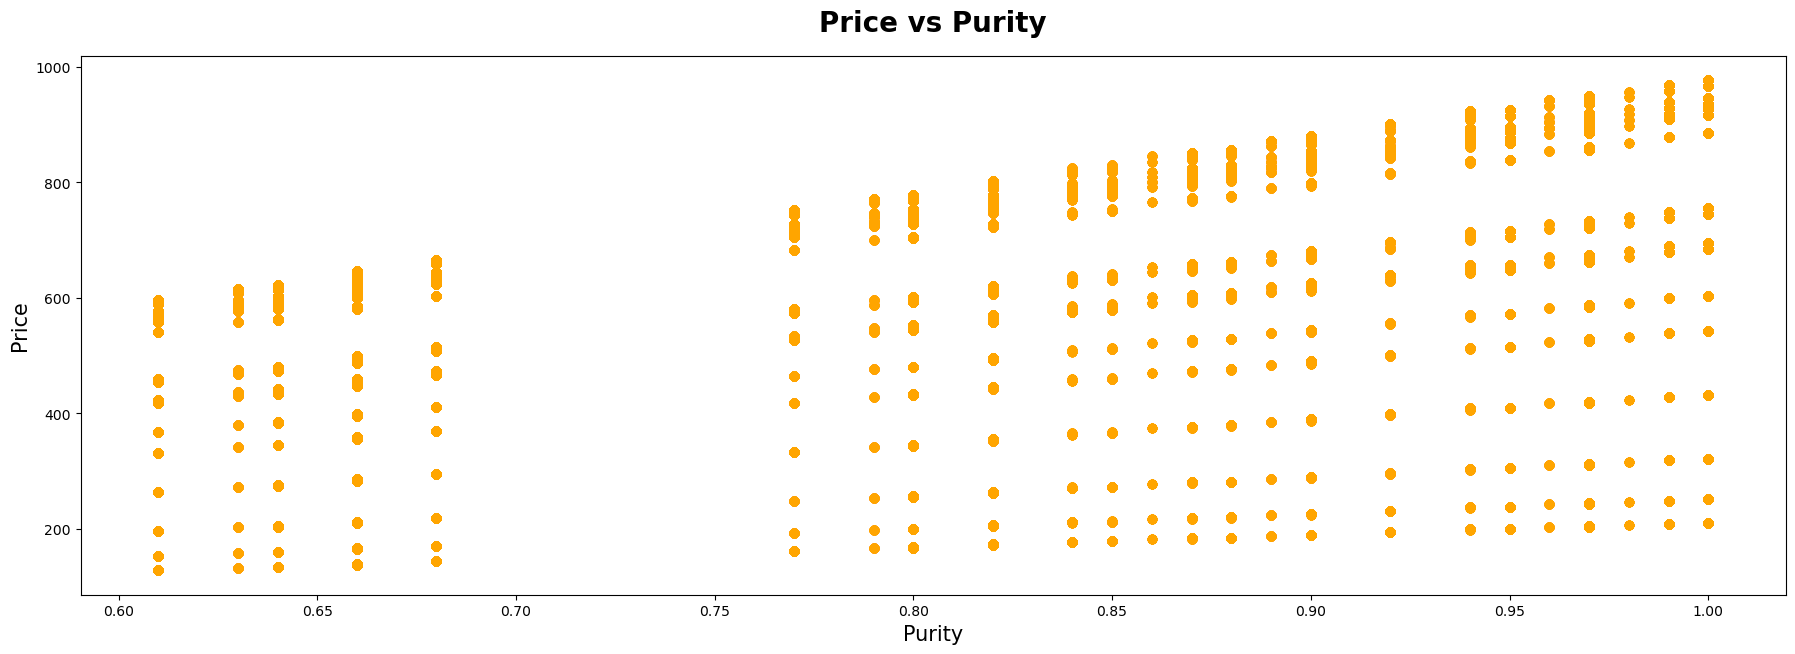

In [15]:
#Scatter plot

plt.figure(figsize=(22, 7))

plt.scatter(x = df['Purity'], y = df['Price'], color='orange')
plt.title('Price vs Purity', size=20, weight='bold', y=1.03)
plt.xlabel('Purity', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

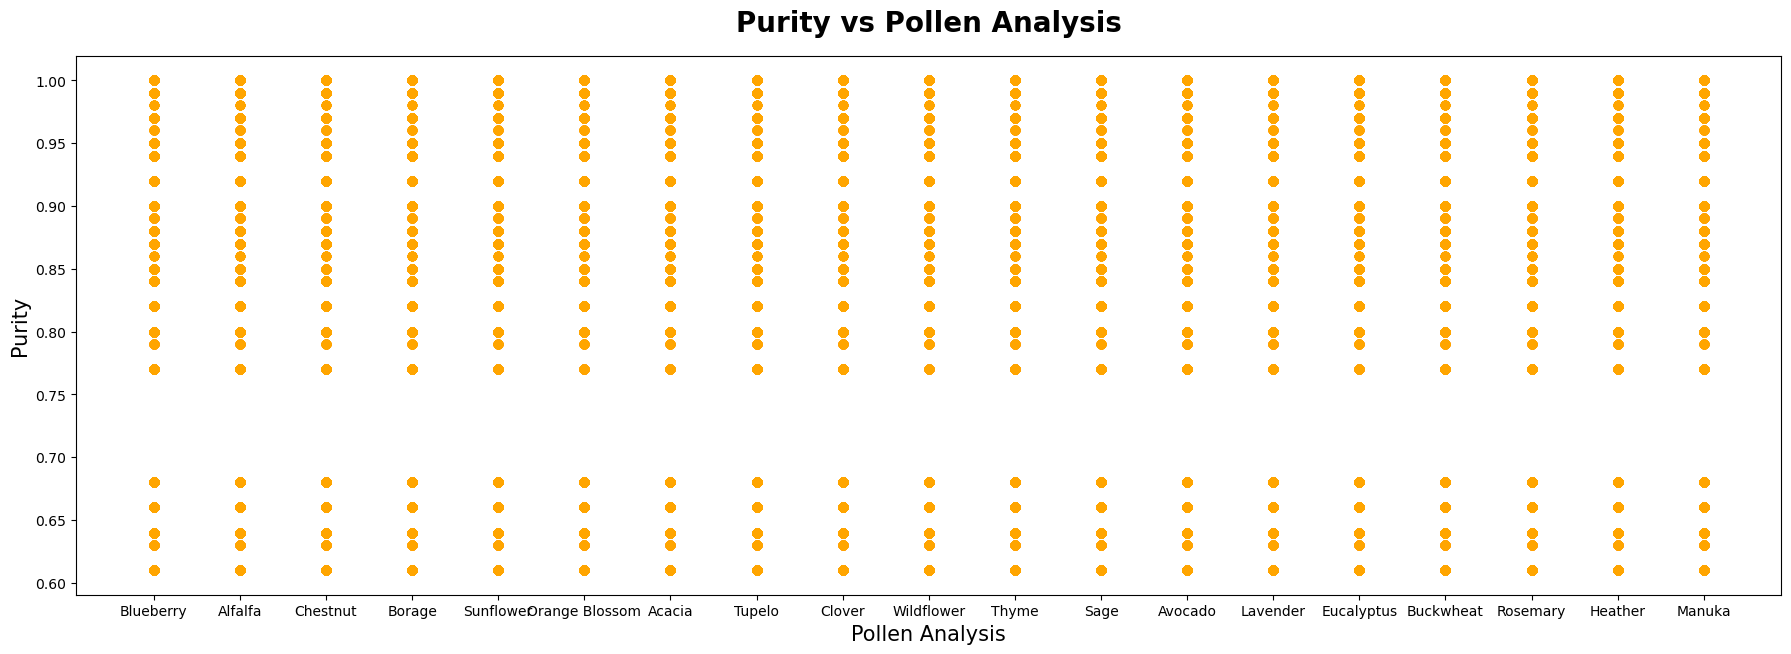

In [16]:
#Scatter plot

plt.figure(figsize=(22, 7))

plt.scatter(x = df['Pollen Analysis'], y = df['Purity'], color='orange')
plt.title('Purity vs Pollen Analysis', size=20, weight='bold', y=1.03)
plt.xlabel('Pollen Analysis', fontsize=15)
plt.ylabel('Purity', fontsize=15)
plt.show()

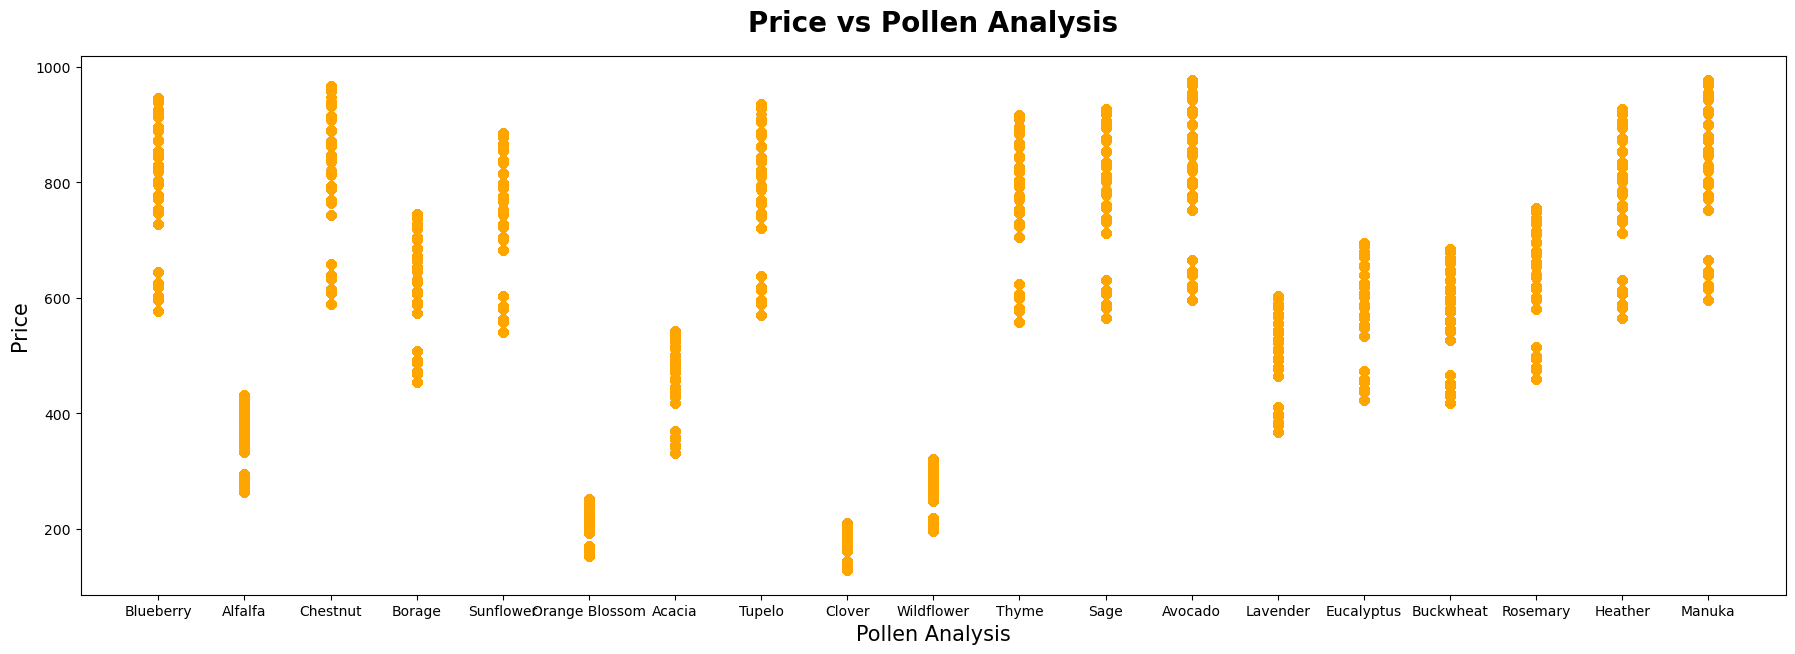

In [17]:
#Scatter plot

plt.figure(figsize=(22, 7))

plt.scatter(x = df['Pollen Analysis'], y = df['Price'], color='orange')
plt.title('Price vs Pollen Analysis', size=20, weight='bold', y=1.03)
plt.xlabel('Pollen Analysis', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

### Feature Engineering

In [89]:
df_normalized

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Pollen Analysis,Viscosity,Purity,Price
0,0.201111,0.830769,0.849231,0.758,0.30,0.634000,0.5452,Blueberry,0.393468,0.179487,0.609125
1,0.941111,0.938462,0.423077,0.940,0.05,0.605000,0.5764,Alfalfa,0.610473,0.717949,0.303230
2,0.401111,0.969231,0.901538,0.962,0.50,0.249000,0.5744,Chestnut,0.633365,0.128205,0.602521
3,0.085556,0.292308,0.354615,0.302,0.40,0.384000,0.3260,Blueberry,0.666772,1.000000,0.964350
4,0.567778,0.061538,0.586923,0.464,1.00,0.321667,0.9008,Alfalfa,0.426520,1.000000,0.358385
...,...,...,...,...,...,...,...,...,...,...,...
247898,0.108889,0.123077,0.453846,0.464,0.95,0.536667,0.5876,Rosemary,0.795487,1.000000,0.738540
247899,0.575556,0.707692,0.580000,0.482,0.75,0.371667,0.0328,Acacia,0.639928,1.000000,0.489039
247900,0.753333,0.430769,0.290769,0.638,0.15,0.820000,0.9628,Chestnut,0.310561,0.076923,0.574006
247901,0.531111,0.815385,0.227692,0.862,0.65,0.906333,0.7116,Avocado,0.343261,0.923077,0.967723


In [108]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

label_encoder = LabelEncoder()
df['Pollen Analysis Encoded'] = label_encoder.fit_transform(df['Pollen Analysis'])

df = df.drop(['Pollen Analysis'], axis=1)
df

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Viscosity,Purity,Price,Pollen Analysis Encoded
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,4844.50,0.68,645.24,3
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,6689.02,0.89,385.85,1
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,6883.60,0.66,639.64,6
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,7167.56,1.00,946.46,3
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,5125.44,1.00,432.62,1
...,...,...,...,...,...,...,...,...,...,...,...
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,8261.63,1.00,754.98,13
247899,6.18,1.67,19.54,4.91,0.85,31.15,20.82,6939.39,1.00,543.41,0
247900,7.78,1.49,15.78,5.69,0.73,44.60,44.07,4139.79,0.64,615.46,6
247901,5.78,1.74,14.96,6.81,0.83,47.19,37.79,4417.74,0.97,949.32,2


In [123]:
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[df_normalized.columns] = scaler.fit_transform(df_normalized[df_normalized.columns])

In [124]:
df_normalized

,Color Score,Density,Water Content,pH,Electrical Conductivity,Fructose Level,Glucose Level,Viscosity,Purity,Price,Pollen Analysis Encoded
0,0.201111,0.830769,0.849231,0.758,0.30,0.634000,0.5452,0.393468,0.179487,0.609125,0.166667
1,0.941111,0.938462,0.423077,0.940,0.05,0.605000,0.5764,0.610473,0.717949,0.303230,0.055556
2,0.401111,0.969231,0.901538,0.962,0.50,0.249000,0.5744,0.633365,0.128205,0.602521,0.333333
3,0.085556,0.292308,0.354615,0.302,0.40,0.384000,0.3260,0.666772,1.000000,0.964350,0.166667
4,0.567778,0.061538,0.586923,0.464,1.00,0.321667,0.9008,0.426520,1.000000,0.358385,0.055556
...,...,...,...,...,...,...,...,...,...,...,...
247898,0.108889,0.123077,0.453846,0.464,0.95,0.536667,0.5876,0.795487,1.000000,0.738540,0.722222
247899,0.575556,0.707692,0.580000,0.482,0.75,0.371667,0.0328,0.639928,1.000000,0.489039,0.000000
247900,0.753333,0.430769,0.290769,0.638,0.15,0.820000,0.9628,0.310561,0.076923,0.574006,0.333333
247901,0.531111,0.815385,0.227692,0.862,0.65,0.906333,0.7116,0.343261,0.923077,0.967723,0.111111


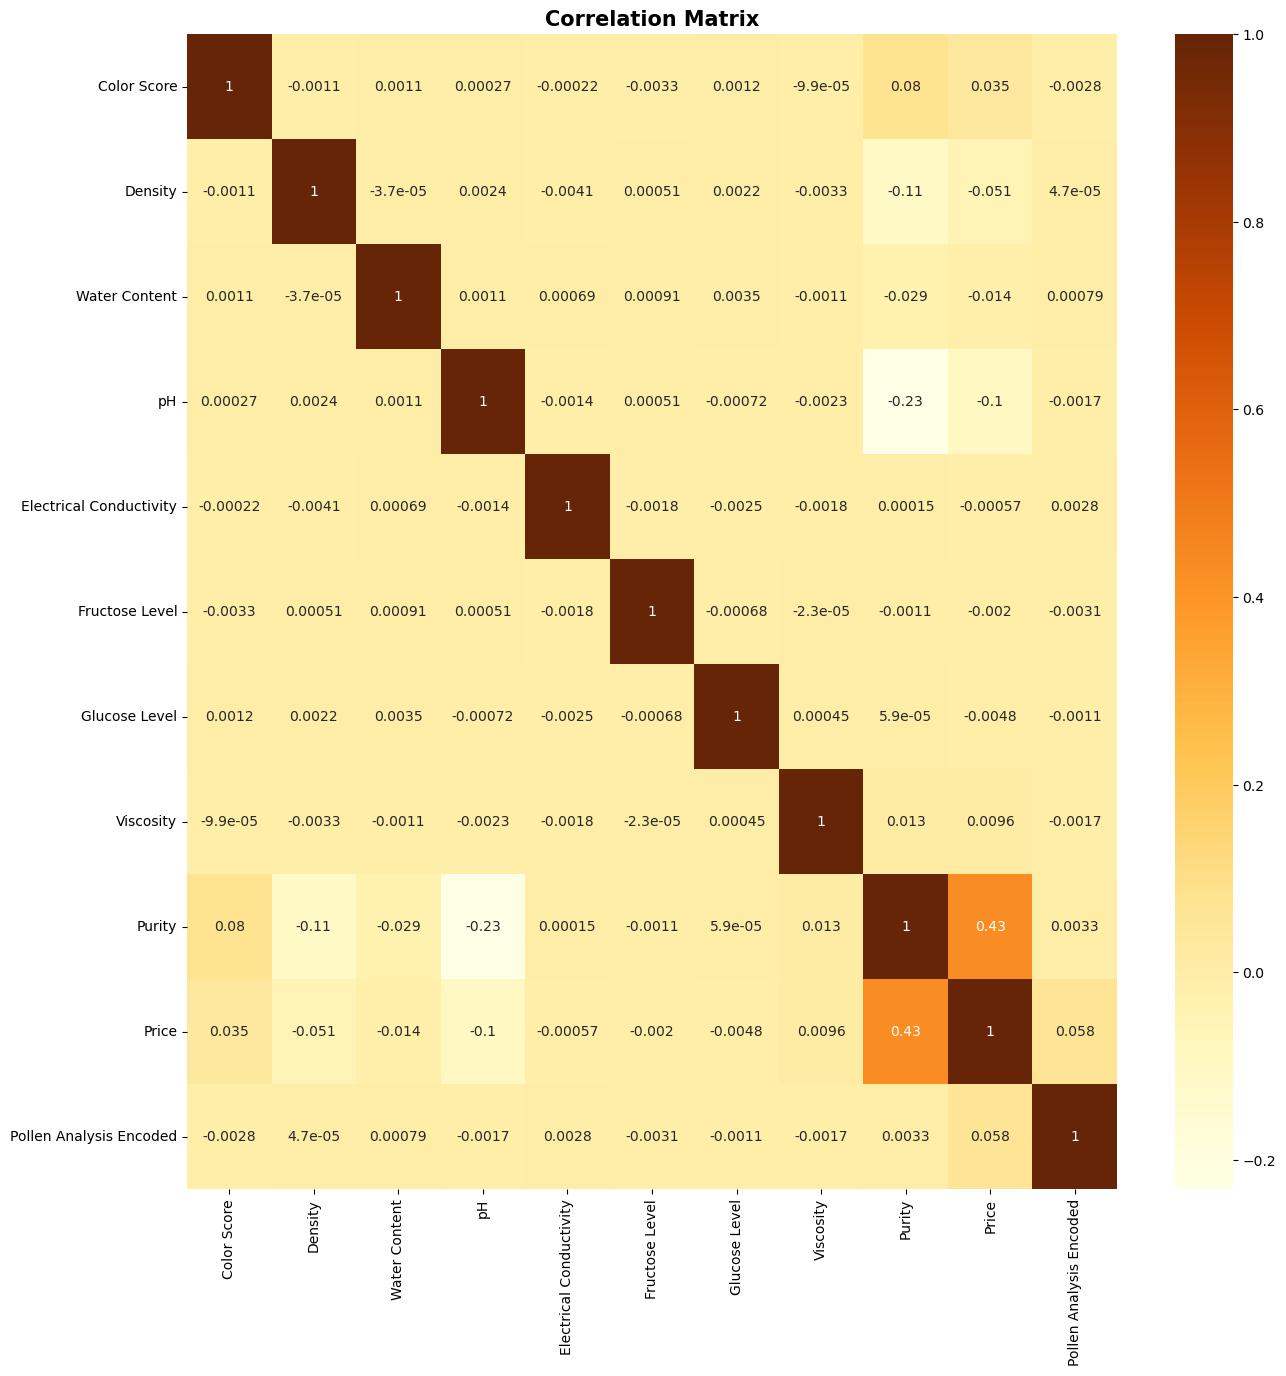

In [125]:
# Correlation matrix

plt.figure(figsize=(15, 15))

correlation_matrix = df_normalized.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr')
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

In [126]:
correlation_score_purity = correlation_matrix['Purity'].sort_values(ascending=False)
correlation_score_price = correlation_matrix['Price'].sort_values(ascending=False)

print('Correlation score for Purity')
print('-'*35)
print(correlation_score_purity,'\n\n')

print('Correlation score for Price')
print('-'*35)
print(correlation_score_price)

Correlation score for Purity
-----------------------------------
Purity                     1.000000
Price                      0.432581
Color Score                0.079770
Viscosity                  0.012572
Pollen Analysis Encoded    0.003305
Electrical Conductivity    0.000151
Glucose Level              0.000059
Fructose Level            -0.001149
Water Content             -0.028894
Density                   -0.108834
pH                        -0.230855
Name: Purity, dtype: float64 


Correlation score for Price
-----------------------------------
Price                      1.000000
Purity                     0.432581
Pollen Analysis Encoded    0.058498
Color Score                0.035166
Viscosity                  0.009632
Electrical Conductivity   -0.000571
Fructose Level            -0.002041
Glucose Level             -0.004815
Water Content             -0.014381
Density                   -0.050518
pH                        -0.100714
Name: Price, dtype: float64


### Honey Price Prediction

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error